
#PyTorch Basics: Deep Learning & Data Analysis

**Over the next few weeks we will learn the basics of Deep Learning using pytorch**

Do the coding exercises below, add comments and markdown explanations, and upload the resulting notebook together with the collab corresponding to mini project 2.

This notebook covers:

1. Problem setup & data splits (train/val/test)  
2. PyTorch tensors, datasets, and dataloaders  
3. Models: linear regression, MLP for classification, CNN
4. Losses, regularization (L2/weight decay & dropout), and metrics  
5. Optimization: gradient descent w/ `torch.optim`   
6. Experiment tracking: random seeds, reproducibility, and plotting learning curves  

> This notebook uses only standard libraries available in Colab: `torch`, `numpy`, `matplotlib`, and the `sklearn` library for toy data.


In [2]:
#@title Imports & reproducibility helpers
import math, random, os, time
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from typing import Tuple, Dict, Any

try:
    from sklearn.datasets import make_moons, make_circles
    _HAS_SKLEARN = True
except Exception as e:
    print("scikit-learn not found; synthetic dataset generators will fall back to torch-only.")
    _HAS_SKLEARN = False

import matplotlib.pyplot as plt

def set_seed(seed: int = 123):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
set_seed(7)
DEVICE


'cuda'

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

##-1) Tensors

Tensors in pytorch are very similar to numpy arrays

1. 🧩 How do we construct a tensor?

Say we want to construct the following tensor using torch functions:

```python
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

2. 🧩 What's the size of this tensor?


In [3]:
#@title Answer 1
my_tensor = torch.tensor([[0, 1, 2],
                          [3, 4, 5],
                          [6, 7, 8]])

print(my_tensor)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [4]:
#@title Answer 2
my_tensor.shape

torch.Size([3, 3])

In [5]:
#@title Pytorch has many useful functions for creating, indexing and operating with tensor
# Parameters
sequence = torch.arange(5)   # [0, 1, 2, 3, 4]
repeats = 3                  # number of times to repeat

# Construct the repeated tensor
x = sequence.repeat(repeats)

print(sequence), print(x)

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])


(None, None)

In [6]:
#@title 🧩 Print a tensor of size (5,3), where all the values have one fixed size
torch.full((5,3), -2.0)

tensor([[-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.],
        [-2., -2., -2.]])

###🧩 Construct* the following tensor:

```python
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

At some point in my code, I need to write an equation that uses 2 * pi.
I get an error allerting  me that my code returns a float where a tensor is expected. What is the type of

```python
type(2*torch.py)
```
and how do I turn into a tensor?


In [7]:
#@title 🧩 Use pytorch functions to generate this matrix

n = 4
A = torch.eye(n)                         # diagonal of 1s
A += torch.diag(torch.full((n-1,), -2.), diagonal=-1)  # sub-diagonal
A += torch.diag(torch.full((n-1,), -2.), diagonal=1)   # super-diagonal

print(A)

tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 0) Broadcasting, Indexing, and Distributions in PyTorch

**Goal:** Practice *broadcasting*, *masking*, and *distributions* in PyTorch through short guided exercises.

Run each code cell, fill in the `# TODO` parts, and test your answers.


In [8]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt
torch.manual_seed(0)



## Broadcasting and Fancy Indexing

Broadcasting and indexing make PyTorch efficient and expressive.



### 🧩 Exercise 0.1  
Construct a tensor `X` where `X[i,j] = 2*i + j` using broadcasting.  

**Example Output:**
```
tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])
```


In [9]:

# TODO: Construct X using broadcasting
# i = torch.arange(...).view(-1, 1)
# j = torch.arange(...).view(1, -1)
# X = ...
i = torch.arange(0, 3).view(-1, 1)
j = torch.arange(0, 4).view(1, -1)
X = 2 * i + j
print(X) 

tensor([[0, 1, 2, 3],
        [2, 3, 4, 5],
        [4, 5, 6, 7]])


### 🧩 Exercise 0.2  
Compute a **distance matrix** `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`.  

Use broadcasting (no loops).


In [10]:

X = torch.arange(12, dtype=float).reshape(6, 2)
# TODO: Compute pairwise distances using broadcasting
# D = ...

D = torch.sqrt(((X[:, None, :] - X[None, :, :]) ** 2).sum(-1))
print(D)


tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137, 14.1421],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [14.1421, 11.3137,  8.4853,  5.6569,  2.8284,  0.0000]],
       dtype=torch.float64)



### 🧩 Exercise 0.3  
Extract the submatrix of rows `[1,4]` and columns `[0,2,3]` of  
`A = torch.arange(36).reshape(6, 6)`

**Expected Output:**
```
tensor([[ 6,  8,  9],
        [24, 26, 27]])
```


In [11]:
A = torch.arange(36).reshape(6, 6)
# TODO: Extract submatrix using indexing
# rows = torch.tensor([...])
# cols = torch.tensor([...])
# subA = ...

rows = torch.tensor([1, 4])
cols = torch.tensor([0, 2, 3])
subA = A[rows[:, None], cols]
print(subA)

tensor([[ 6,  8,  9],
        [24, 26, 27]])



### 🧩 Exercise 0.4  
Create a **boolean mask** `M` where `M[i,j]` is True iff `A[i,j]` is divisible by 5 or 7.


In [12]:
A = torch.arange(36).reshape(6, 6)
# TODO: Create boolean mask
# M = ...
# print(M.sum())

M = (A % 5 == 0) | (A % 7 == 0)
print(M)


tensor([[ True, False, False, False, False,  True],
        [False,  True, False, False,  True, False],
        [False, False,  True,  True, False, False],
        [False, False,  True,  True, False, False],
        [False,  True, False, False,  True, False],
        [ True, False, False, False, False,  True]])



### 🧩 Exercise 0.5  
Using the mask `M`, add 10 to elements of `A` that are divisible by 5 or 7 (in-place).


In [13]:

# TODO: Update A in-place
# A[M] += 10
# print(A)
print(A)
A[M] += 10
print(A)


tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]])
tensor([[10,  1,  2,  3,  4, 15],
        [ 6, 17,  8,  9, 20, 11],
        [12, 13, 24, 25, 16, 17],
        [18, 19, 30, 31, 22, 23],
        [24, 35, 26, 27, 38, 29],
        [40, 31, 32, 33, 34, 45]])



## Distributions

`torch.distributions` provides a clean API for probability distributions and supports broadcasting.



### 🧩 Exercise 0.6  
Draw **100 samples** from a Poisson distribution with rate λ = 4.5.


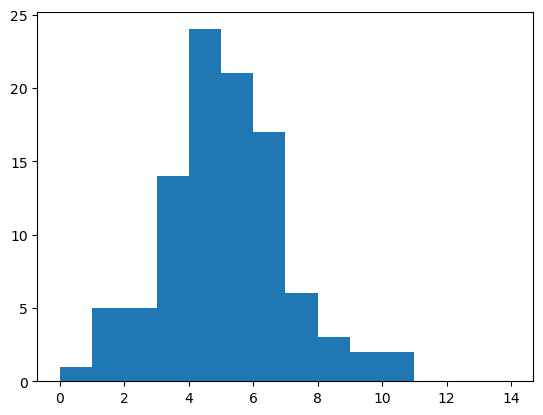

In [14]:

# TODO: Draw samples and plot histogram
# samples = dist.Poisson(4.5).sample((100,))
# plt.hist(samples.numpy(), bins=range(0,15))
# plt.show()
samples = dist.Poisson(4.5).sample((100,))
plt.hist(samples.numpy(), bins=range(0,15))
plt.show()



### 🧩 🧩 Exercise 0.7  
Construct a matrix `P` where  
`P[i,j] = exp(-λ[i]) * λ[i]^j / j!`  
for λ = `torch.arange(1.,6.)` and j = `torch.arange(5.)`.


In [15]:

lam = torch.arange(1.,6.).view(-1,1)
j = torch.arange(5.).view(1,-1)
# TODO: Compute P using broadcasting and torch.lgamma
# factorial = torch.exp(torch.lgamma(j+1))
# P = ...
factorial = torch.exp(torch.lgamma(j+1))
P = (lam ** j) * torch.exp(-lam) / factorial
print(P)



tensor([[0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954],
        [0.0067, 0.0337, 0.0842, 0.1404, 0.1755]])



### 🧩 🧩 Exercise 0.8
Evaluate the **log-probability** of `[0.5, 2.0, 5.0]`  
under a Gamma distribution with shape=3.0, rate=2.0.


In [16]:

# TODO: Evaluate log probability
# g = dist.Gamma(concentration=3.0, rate=2.0)
# logp = g.log_prob(torch.tensor([0.5, 2.0, 5.0]))
# print(logp)
g = dist.Gamma(concentration=3.0, rate=2.0)
logp = g.log_prob(torch.tensor([0.5, 2.0, 5.0]))
print(logp)


tensor([-1.0000, -1.2274, -5.3948])



### 🧩 Problem 0.9  
Draw **1000 samples** from a mixture of two Poisson distributions  
with rates 2 and 7, equal weights (0.5, 0.5).  
Plot a normalized histogram.


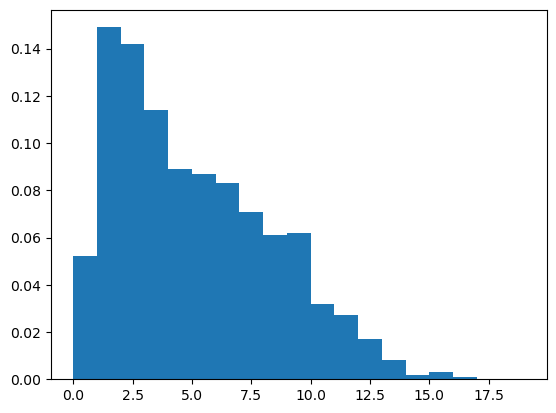

In [17]:

# TODO: Draw samples from mixture
# z = torch.bernoulli(torch.full((1000,), 0.5))
# lam = torch.where(z.bool(), torch.tensor(7.), torch.tensor(2.))
# samples = dist.Poisson(lam).sample()
# plt.hist(samples.numpy(), bins=range(0,20), density=True)
# plt.show()
z = torch.bernoulli(torch.full((1000,), 0.5))
lam = torch.where(z.bool(), torch.tensor(7.), torch.tensor(2.))
samples = dist.Poisson(lam).sample()
plt.hist(samples.numpy(), bins=range(0,20), density=True)
plt.show()



## Normal Distributions



### 🧩 Problem 0.10  
Use `dist.Normal` to draw a batch of shape `(200, 3)` of independent standard normal random variables.


In [18]:

# TODO: Draw standard normal samples
# normals = dist.Normal(0, 1).sample((200,3))
# print(normals.shape)
normals = dist.Normal(0, 1).sample((200,3))
print(normals.shape)


torch.Size([200, 3])



### 🧩 Problem 0.11  
Use `dist.Normal` to draw a batch of shape `(4, 4)`  
with means given by `mu` and variance 1.0.


In [19]:

mu = torch.tensor([[ 0,  1,  2,  3],
                   [ 4,  5,  6,  7],
                   [ 8,  9, 10, 11],
                   [12, 13, 14, 15]], dtype=torch.float32)
# TODO: Draw samples
# samples = dist.Normal(mu, 1.0).sample()
# print(samples.shape)
samples = dist.Normal(mu, 1.0).sample()
print(samples.shape)


torch.Size([4, 4])



---
### ✅ Notes / Extensions

- Vary λ and j shapes to visualize broadcasting.  
- Plot distance matrices `plt.imshow(D)` to see patterns.  
- Compare the Poisson mixture histogram with theoretical PMFs.  
- Explore `dist.MixtureSameFamily` for more complex mixtures.


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


# 1) Data: from arrays to `Dataset`/`DataLoader` + train/val/test split

**Key ideas**
- Always separate data into **train / validation / test** (e.g., 70/15/15).  
- Wrap arrays in a custom `Dataset` to keep the training loop clean.  
- Use a `DataLoader` for batching, shuffling, and parallel loading.

We'll start with toy 2D datasets for classification (moons and circles) and a simple 1D regression problem.


In [20]:

#@title Toy datasets (classification: moons/circles) + (regression: y = ax + b + noise)
def make_toy_classification(n_samples=1000, kind="moons", noise=0.2, seed=0):
    set_seed(seed)
    if _HAS_SKLEARN:
        if kind == "moons":
            X, y = make_moons(n_samples=n_samples, noise=noise)
        elif kind == "circles":
            X, y = make_circles(n_samples=n_samples, factor=0.4, noise=noise)
        else:
            raise ValueError("kind must be 'moons' or 'circles'")
        X = X.astype(np.float32); y = y.astype(np.int64)
    else:
        # Torch-only fallback: two Gaussian blobs
        c1 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([0.0, 0.0])
        c2 = torch.randn(n_samples//2, 2) * (1+noise) + torch.tensor([2.5, 2.5])
        X = torch.cat([c1, c2], dim=0).numpy().astype(np.float32)
        y = torch.cat([torch.zeros(len(c1)), torch.ones(len(c2))]).numpy().astype(np.int64)
    return X, y

def make_toy_regression(n_samples=600, a=2.0, b=-1.0, noise_std=0.3, seed=0):
    set_seed(seed)
    x = np.random.uniform(-2.0, 2.0, size=(n_samples, 1)).astype(np.float32)
    y = (a * x + b + np.random.normal(0, noise_std, size=x.shape)).astype(np.float32)
    return x, y

class NumpyDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def train_val_test_split(ds: Dataset, ratios=(0.7, 0.15, 0.15), seed=42):
    assert abs(sum(ratios) - 1.0) < 1e-6, "Ratios must sum to 1"
    n = len(ds)
    n_train = int(ratios[0] * n)
    n_val = int(ratios[1] * n)
    n_test = n - n_train - n_val
    set_seed(seed)
    return random_split(ds, [n_train, n_val, n_test])


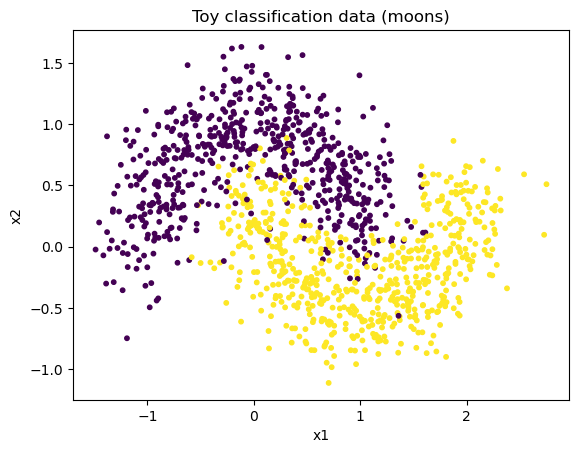

(840, 180, 180)

In [21]:

#@title Visualize a toy classification dataset
Xc, yc = make_toy_classification(n_samples=1200, kind="moons", noise=0.25, seed=1)
ds_cls = NumpyDataset(Xc, yc)
train_ds, val_ds, test_ds = train_val_test_split(ds_cls, (0.7, 0.15, 0.15), seed=1)

plt.figure()
plt.scatter(Xc[:,0], Xc[:,1], c=yc, s=10)
plt.title("Toy classification data (moons)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

len(train_ds), len(val_ds), len(test_ds)


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩

## 2) Linear Regression in PyTorch (MSE loss)

We'll fit a line to noisy data: \( y \approx ax + b \).  
This section introduces:
- `nn.Module` for models
- Mean Squared Error (MSE) loss
- `optim.SGD` and `optim.Adam`


In [22]:
#@title Linear regression dataset & model
Xr, yr = make_toy_regression(n_samples=600, a=2.2, b=-0.7, noise_std=0.35, seed=2)
ds_reg = NumpyDataset(Xr, yr)

train_r, val_r, test_r = train_val_test_split(ds_reg, (0.7, 0.15, 0.15), seed=2)
train_loader_r = DataLoader(train_r, batch_size=64, shuffle=True)
val_loader_r   = DataLoader(val_r, batch_size=128, shuffle=False)
test_loader_r  = DataLoader(test_r, batch_size=128, shuffle=False)

class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)

model = LinearRegressor().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0.0)  # weight_decay = L2


In [24]:
#@title Training & evaluation utilities
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)

@torch.no_grad()
def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        preds = model(xb)
        loss = criterion(preds, yb)
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)


Epoch 050 | train: 0.1175 | val: 0.0840
Epoch 100 | train: 0.1170 | val: 0.0847
Epoch 150 | train: 0.1170 | val: 0.0847
Epoch 200 | train: 0.1170 | val: 0.0848


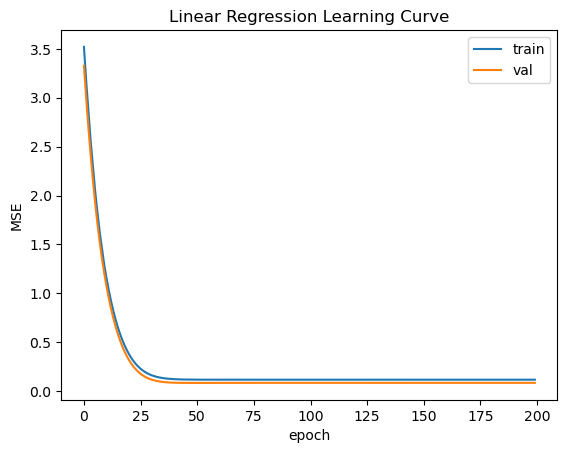

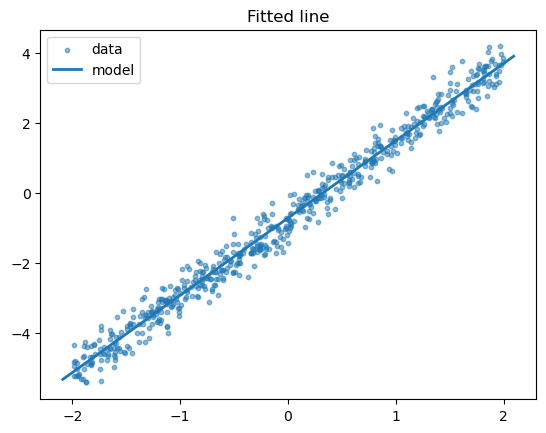

In [25]:

#@title Fit linear model & plot learning curve
train_hist, val_hist = [], []
epochs = 200
best_val = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    tr = train_epoch(model, train_loader_r, criterion, optimizer)
    va = evaluate(model, val_loader_r, criterion)
    train_hist.append(tr); val_hist.append(va)
    if va < best_val:
        best_val = va; best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
    if epoch % 50 == 0:
        print(f"Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

# restore best
model.load_state_dict(best_state)

plt.figure()
plt.plot(train_hist, label="train")
plt.plot(val_hist, label="val")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Linear Regression Learning Curve")
plt.legend(); plt.show()

# Visualize fit
@torch.no_grad()
def predict(x):
    return model(torch.from_numpy(x).to(DEVICE)).cpu().numpy()

xs = np.linspace(Xr.min()-0.1, Xr.max()+0.1, 200).reshape(-1,1).astype(np.float32)
ys = predict(xs)

plt.figure()
plt.scatter(Xr, yr, s=10, alpha=0.5, label="data")
plt.plot(xs, ys, linewidth=2, label="model")
plt.legend(); plt.title("Fitted line"); plt.show()


# Exercise A
Create a synthetic data where the regressor x is an (n,2) dimensional tensor
and the target y is a (n,4) dimensional tensor. Does the LinearRegressor model
``` python
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
    def forward(self, x):
        return self.linear(x)
```
work? Why or why not? How can you modify the class to make it work? Once you fit the model, visualize the result.

No this won't work - it takes in 1 unput feature and produces 1 output. You're asking for 2 inputs an 4 outputs

In [26]:
class LinearRegressor(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self, x):
        return self.linear(x)

In [27]:
#@title Multivariate regression dataset & model
set_seed(42)
Xr_multi = np.random.uniform(-2.0, 2.0, size=(600, 2)).astype(np.float32)
W_true = np.array([[1.5, -0.5, 2.0, 0.8],
                   [0.3, 1.2, -1.0, 1.5]], dtype=np.float32)
b_true = np.array([0.5, -0.3, 1.0, -0.5], dtype=np.float32)
yr_multi = (Xr_multi @ W_true + b_true + np.random.normal(0, 0.2, size=(600, 4))).astype(np.float32)
ds_r_multi = NumpyDataset(Xr_multi, yr_multi)

train_r_multi, val_r_multi, test_r_multi = train_val_test_split(ds_r_multi, (0.7, 0.15, 0.15), seed=42)
train_loader_r_multi = DataLoader(train_r_multi, batch_size=64, shuffle=True)
val_loader_r_multi   = DataLoader(val_r_multi, batch_size=128, shuffle=False)
test_loader_r_multi  = DataLoader(test_r_multi, batch_size=128, shuffle=False)

model_multi = LinearRegressor(in_features=2, out_features=4).to(DEVICE)
criterion_multi = nn.MSELoss()
optimizer_multi = torch.optim.Adam(model_multi.parameters(), lr=1e-2, weight_decay=0.0)

Epoch 030 | train: 0.3309 | val: 0.3032
Epoch 060 | train: 0.0440 | val: 0.0399
Epoch 090 | train: 0.0402 | val: 0.0377
Epoch 120 | train: 0.0402 | val: 0.0377
Epoch 150 | train: 0.0402 | val: 0.0377


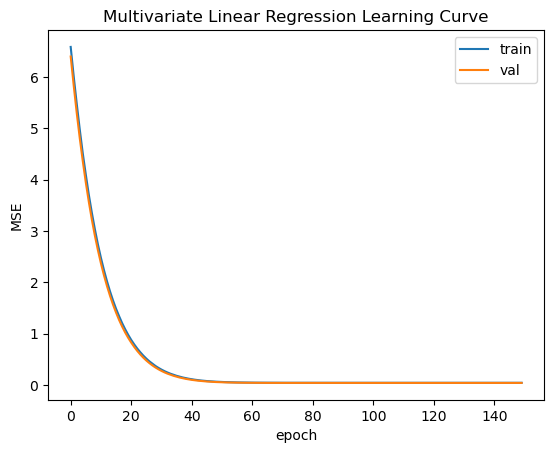

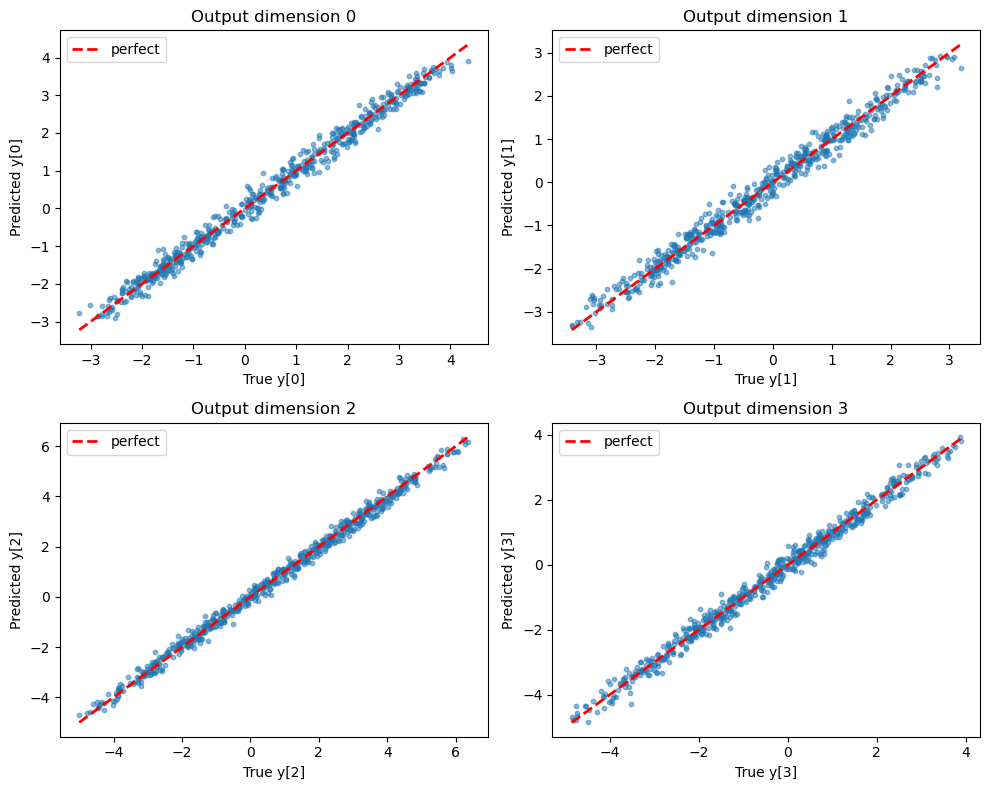

In [28]:
#@title Fit multivariate linear model & plot learning curve
train_hist_multi, val_hist_multi = [], []
epochs = 150
best_val_multi = float("inf")
best_state_multi = None

for epoch in range(1, epochs+1):
    tr = train_epoch(model_multi, train_loader_r_multi, criterion_multi, optimizer_multi)
    va = evaluate(model_multi, val_loader_r_multi, criterion_multi)
    train_hist_multi.append(tr); val_hist_multi.append(va)
    if va < best_val_multi:
        best_val_multi = va
        best_state_multi = {k: v.cpu().clone() for k, v in model_multi.state_dict().items()}
    if epoch % 30 == 0:
        print(f"Epoch {epoch:03d} | train: {tr:.4f} | val: {va:.4f}")

# restore best
model_multi.load_state_dict(best_state_multi)

plt.figure()
plt.plot(train_hist_multi, label="train")
plt.plot(val_hist_multi, label="val")
plt.xlabel("epoch"); plt.ylabel("MSE")
plt.title("Multivariate Linear Regression Learning Curve")
plt.legend(); plt.show()

# Visualize predictions vs true for all 4 output dimensions
@torch.no_grad()
def predict_multi(x):
    return model_multi(torch.from_numpy(x).to(DEVICE)).cpu().numpy()

y_pred_multi = predict_multi(Xr_multi)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()
for i in range(4):
    axes[i].scatter(yr_multi[:, i], y_pred_multi[:, i], s=10, alpha=0.5)
    min_val, max_val = yr_multi[:, i].min(), yr_multi[:, i].max()
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='perfect')
    axes[i].set_xlabel(f"True y[{i}]")
    axes[i].set_ylabel(f"Predicted y[{i}]")
    axes[i].set_title(f"Output dimension {i}")
    axes[i].legend()
plt.tight_layout(); plt.show()

## Exercise C
### Write your own Mean Squared Error

PyTorch provides a built-in criterion:

```python
criterion = nn.MSELoss()

But it’s important to understand what happens under the hood.
Let’s implement our own version — call it nn.MeanSquaredOops — that behaves like nn.MSELoss. It should work as a callable class:

```python
criterion = MeanSquaredOops()
loss = criterion(y_pred, y_true)


```python
# YOUR WORK: Implement MeanSquaredOops to mimic nn.MSELoss

import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, y_pred, y_true):
        # compute the mean of squared differences
        raise NotImplementedError("Implement the MSE formula here!")

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("Your MeanSquaredOops:", oops(y_pred, y_true).item())

```

Write a function to visualize the loss function curves on: training, testing and evaluation datasets. How do they look like?

PyTorch MSELoss: 0.17000000178813934
My MeanSquaredOops: 0.17000000178813934

Example: Visualizing loss curves on regression dataset
Epoch 020 | train: 0.3070 | val: 0.2326 | test: 0.3080
Epoch 040 | train: 0.1181 | val: 0.0839 | test: 0.1400
Epoch 060 | train: 0.1169 | val: 0.0848 | test: 0.1415
Epoch 080 | train: 0.1169 | val: 0.0849 | test: 0.1418
Epoch 100 | train: 0.1169 | val: 0.0848 | test: 0.1417


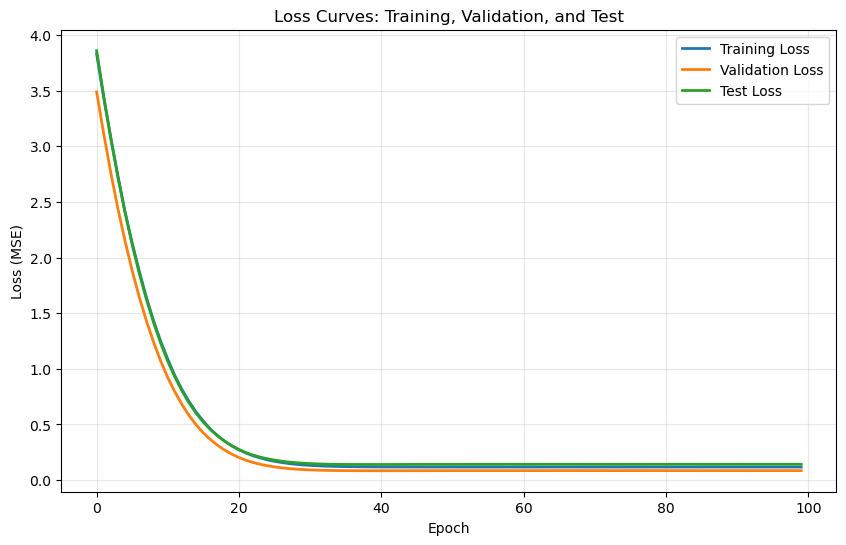


Final Losses:
  Training: 0.1169
  Validation: 0.0848
  Test: 0.1417


In [29]:

#@title My loss function: Mean Squared Oops
import torch
import torch.nn as nn

class MeanSquaredOops(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, y_pred, y_true):
        # Compute the mean of squared differences
        # MSE = (1/n) * sum((y_pred - y_true)^2)
        squared_diff = (y_pred - y_true) ** 2
        return squared_diff.mean()

# Test it
criterion = nn.MSELoss()
oops = MeanSquaredOops()

y_pred = torch.tensor([2.5, 0.0, 2.1])
y_true = torch.tensor([3.0, -0.5, 2.0])

print("PyTorch MSELoss:", criterion(y_pred, y_true).item())
print("My MeanSquaredOops:", oops(y_pred, y_true).item())

# Function to visualize loss curves on training, validation, and test datasets
def visualize_loss_curves(train_losses, val_losses, test_losses):
    """
    Visualize loss curves for train, validation, and test sets.
    
    Args:
        train_losses: List of training losses per epoch
        val_losses: List of validation losses per epoch
        test_losses: List of test losses per epoch
    """
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss', linewidth=2)
    plt.plot(val_losses, label='Validation Loss', linewidth=2)
    plt.plot(test_losses, label='Test Loss', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Loss Curves: Training, Validation, and Test')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"\nFinal Losses:")
    print(f"  Training: {train_losses[-1]:.4f}")
    print(f"  Validation: {val_losses[-1]:.4f}")
    print(f"  Test: {test_losses[-1]:.4f}")

# Example: Train a model and visualize the loss curves
print("\n" + "="*60)
print("Example: Visualizing loss curves on regression dataset")
print("="*60)

# Create a fresh model
model_demo = LinearRegressor(in_features=1, out_features=1).to(DEVICE)
criterion_demo = MeanSquaredOops()  # Using our custom loss!
optimizer_demo = torch.optim.Adam(model_demo.parameters(), lr=1e-2, weight_decay=0.0)

train_losses, val_losses, test_losses = [], [], []
epochs = 100

for epoch in range(1, epochs+1):
    # Train
    tr_loss = train_epoch(model_demo, train_loader_r, criterion_demo, optimizer_demo)
    # Evaluate on validation and test
    va_loss = evaluate(model_demo, val_loader_r, criterion_demo)
    te_loss = evaluate(model_demo, test_loader_r, criterion_demo)
    
    train_losses.append(tr_loss)
    val_losses.append(va_loss)
    test_losses.append(te_loss)
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch:03d} | train: {tr_loss:.4f} | val: {va_loss:.4f} | test: {te_loss:.4f}")

# Visualize the curves
visualize_loss_curves(train_losses, val_losses, test_losses)

#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 3) Classification with an MLP (Cross-Entropy loss)

- Two-layer MLP with ReLU and Dropout  
- Cross-entropy loss for a 2-class problem  
- Accuracy metric  
- Optional L2 (weight decay) for regularization  
- Optional learning-rate scheduler


In [30]:

#@title Dataloaders for classification
batch_size = 64
train_loader_c = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader_c   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_loader_c  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)


In [31]:

#@title MLP model, loss, optimizer, scheduler
class MLP(nn.Module):
    def __init__(self, in_dim=2, hidden=64, p_dropout=0.2, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(p_dropout),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, n_classes)
        )
    def forward(self, x):
        return self.net(x)

mlp = MLP().to(DEVICE)
ce = nn.CrossEntropyLoss()
opt = torch.optim.Adam(mlp.parameters(), lr=5e-3, weight_decay=1e-4)  # weight_decay = L2 regularization
sched = torch.optim.lr_scheduler.StepLR(opt, step_size=100, gamma=0.5)


## Exercise D answer
The MLP implements the composite map
$$f(x)=W_3\,\sigma\!\left(W_2\,\text{Dropout}\left(\sigma\left(W_1 x + b_1\right)\right)+b_2\right)+b_3,$$
where $x\in\mathbb{R}^2$, $W_1\in\mathbb{R}^{64\times 2}$, $W_2\in\mathbb{R}^{64\times 64}$, and $W_3\in\mathbb{R}^{2\times 64}$. The network maps each 2-D input to logits in $\mathbb{R}^2$ for binary classification.

- **Linear** layers compute affine transforms $h = Wx + b$, learning weights/biases that project between feature spaces (here: $2\to64$, $64\to64$, $64\to2$).
- **ReLU** applies $\sigma(z)=\max(0,z)$ elementwise, introducing nonlinearity and sparsity.
- **Dropout** randomly zeroes each activation with probability $p_{\text{dropout}}$ during training to reduce co-adaptation and act as regularization.

Immediately before `nn.Dropout(p_dropout)` the tensor has shape $(\text{batch\_size}, 64)$: each example has passed through the first linear layer plus ReLU, yielding a 64-dimensional hidden representation.

## Exercise D
Write using markdown + LaTex what the MLP above is implementing. Explain what ReLU, Dropout, Linear are. Write down what the dimension of an object x.forward is before the nn.Dropout(p_dropout) operation.


In [32]:

#@title Train loop with accuracy
def accuracy_from_logits(logits, y):
    preds = logits.argmax(dim=1)
    return (preds == y).float().mean().item()

def train_epoch_cls(model, loader, criterion, optimizer):
    model.train()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward(); optimizer.step()
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n

@torch.no_grad()
def evaluate_cls(model, loader, criterion):
    model.eval()
    total_loss, total_acc, n = 0.0, 0.0, 0
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        logits = model(xb)
        loss = criterion(logits, yb)
        total_loss += loss.item() * xb.size(0)
        total_acc  += accuracy_from_logits(logits, yb) * xb.size(0)
        n += xb.size(0)
    return total_loss/n, total_acc/n


## Exercise E
Write the code above in as few lines of code as possible. What torch functions can you use?

In [33]:
def _epoch_cls(model, loader, criterion, optimizer=None):
    model.train(optimizer is not None)
    agg = torch.zeros(2, device=DEVICE)
    for xb, yb in loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        if optimizer: optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        if optimizer:
            loss.backward(); optimizer.step()
        agg += torch.stack((loss.detach() * xb.size(0), (logits.argmax(1) == yb).float().sum()))
    return (agg / len(loader.dataset)).tolist()  # [loss, acc]

def train_epoch_cls(model, loader, criterion, optimizer):
    return _epoch_cls(model, loader, criterion, optimizer)

@torch.no_grad()
def evaluate_cls(model, loader, criterion):
    return _epoch_cls(model, loader, criterion)


Epoch 050  loss: 0.135/0.113  acc: 0.942/0.944
Epoch 100  loss: 0.152/0.114  acc: 0.945/0.944
Epoch 100  loss: 0.152/0.114  acc: 0.945/0.944
Epoch 150  loss: 0.139/0.115  acc: 0.949/0.939
Epoch 150  loss: 0.139/0.115  acc: 0.949/0.939
Epoch 200  loss: 0.135/0.119  acc: 0.948/0.939
Epoch 200  loss: 0.135/0.119  acc: 0.948/0.939
Epoch 250  loss: 0.130/0.116  acc: 0.948/0.939
Epoch 250  loss: 0.130/0.116  acc: 0.948/0.939
Epoch 300  loss: 0.129/0.119  acc: 0.956/0.939
Epoch 300  loss: 0.129/0.119  acc: 0.956/0.939


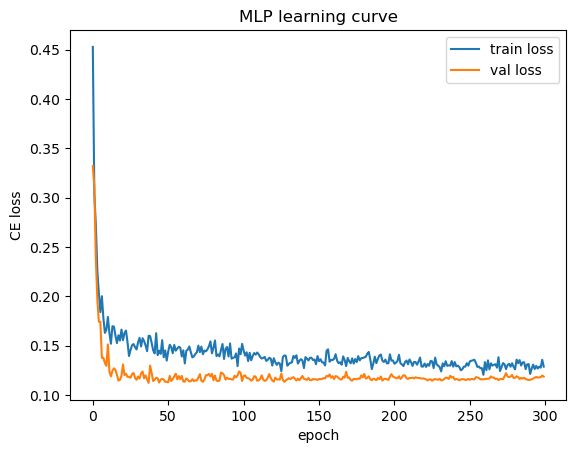

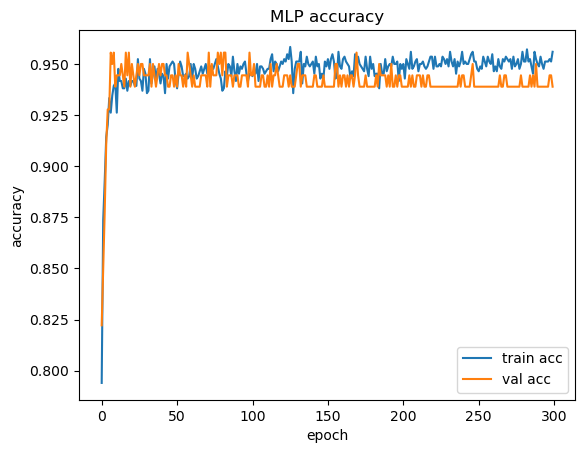

In [34]:

#@title Fit MLP
best_val = 1e9; best_state = None
hist = {"tr_loss":[], "tr_acc":[], "va_loss":[], "va_acc":[]}
epochs = 300

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(mlp, train_loader_c, ce, opt)
    va_loss, va_acc = evaluate_cls(mlp, val_loader_c, ce)
    hist["tr_loss"].append(tr_loss); hist["tr_acc"].append(tr_acc)
    hist["va_loss"].append(va_loss); hist["va_acc"].append(va_acc)
    sched.step()
    if va_loss < best_val:
        best_val = va_loss
        best_state = {k: v.cpu().clone() for k, v in mlp.state_dict().items()}
    if ep % 50 == 0:
        print(f"Epoch {ep:03d}  loss: {tr_loss:.3f}/{va_loss:.3f}  acc: {tr_acc:.3f}/{va_acc:.3f}")

mlp.load_state_dict(best_state)

plt.figure()
plt.plot(hist["tr_loss"], label="train loss")
plt.plot(hist["va_loss"], label="val loss")
plt.xlabel("epoch"); plt.ylabel("CE loss"); plt.legend(); plt.title("MLP learning curve"); plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train acc")
plt.plot(hist["va_acc"], label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend(); plt.title("MLP accuracy"); plt.show()


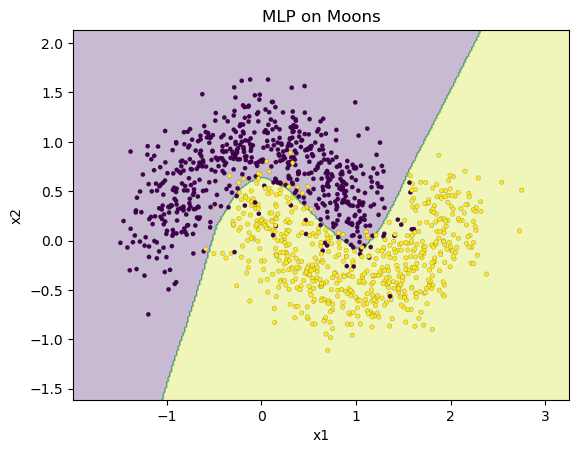

In [35]:

#@title Decision boundary visualization
@torch.no_grad()
def plot_decision_boundary(model, X, y, title="Decision boundary"):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1).astype(np.float32)
    logits = model(torch.from_numpy(grid).to(DEVICE)).cpu().numpy()
    Z = logits.argmax(axis=1).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=10, edgecolor="k", linewidth=0.1)
    plt.title(title); plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

Xc_np, yc_np = Xc, yc
plot_decision_boundary(mlp, Xc_np, yc_np, title="MLP on Moons")


#🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩🧩


## 4) (Optional) Tiny CNN on synthetic images

We'll create small 16×16 grayscale images containing either a **dot** or a **ring** and train a mini-CNN.
This mirrors the idea of "coloring pixels" or simple shape detection and is fast to run on CPU.


In [36]:

#@title Synthetic image dataset (dot vs ring)
def make_dot(center, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    img[center] = 1.0
    return img

def make_ring(center, radius=3, size=16):
    img = np.zeros((size, size), dtype=np.float32)
    cx, cy = center
    for x in range(size):
        for y in range(size):
            if abs(math.hypot(x-cx, y-cy) - radius) < 0.6:
                img[x, y] = 1.0
    return img

def make_image_dataset(n=2000, size=16, seed=0):
    set_seed(seed)
    X, y = [], []
    for i in range(n):
        cls = np.random.randint(0,2)  # 0=dot, 1=ring
        cx, cy = np.random.randint(4, size-4), np.random.randint(4, size-4)
        if cls == 0:
            img = make_dot((cx, cy), size)
        else:
            img = make_ring((cx, cy), radius=np.random.randint(2,4), size=size)
        # jitter + blur-like noise
        img += 0.05 * np.random.randn(size, size).astype(np.float32)
        img = np.clip(img, 0.0, 1.0)
        X.append(img[None, ...])  # channels=1
        y.append(cls)
    X = np.stack(X).astype(np.float32)
    y = np.array(y, dtype=np.int64)
    return X, y

class ImageDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

Xi, yi = make_image_dataset(n=2500, size=16, seed=0)
ds_img = ImageDataset(Xi, yi)
tr_i, va_i, te_i = train_val_test_split(ds_img, (0.7, 0.15, 0.15), seed=3)
tr_li = DataLoader(tr_i, batch_size=128, shuffle=True)
va_li = DataLoader(va_i, batch_size=256, shuffle=False)
te_li = DataLoader(te_i, batch_size=256, shuffle=False)


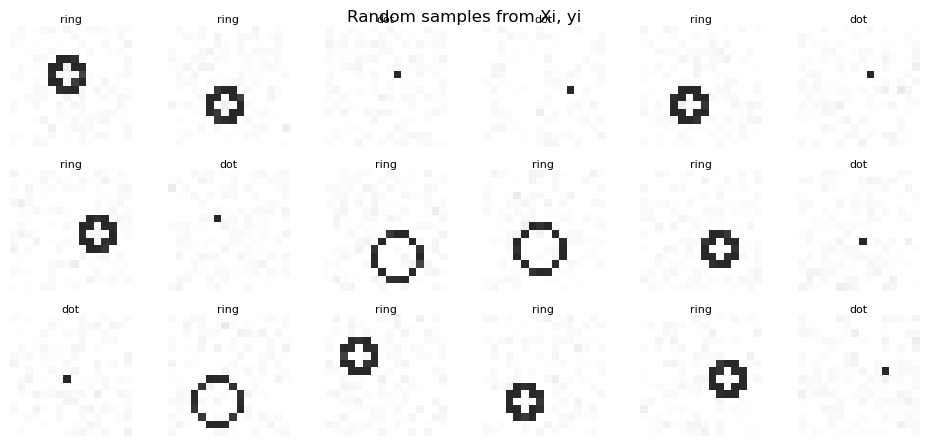

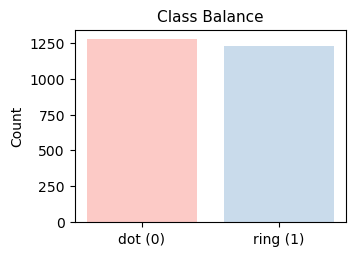

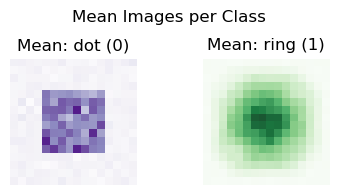

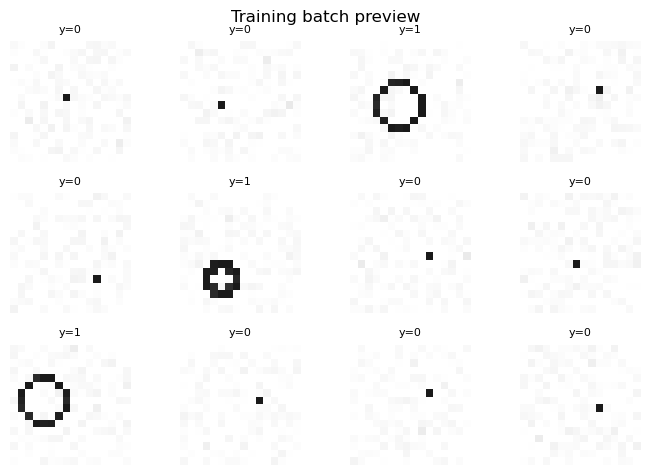

In [37]:
#@title Visualize the Synthetic image dataset (dot vs ring)
import matplotlib.pyplot as plt
import numpy as np

# --- Helper: pastel color palette ---
PASTEL = plt.cm.Pastel1(np.linspace(0, 1, 8))
dot_color, ring_color = PASTEL[0], PASTEL[1]

def visualize_dataset(Xi, yi, nrows=3, ncols=6, size=16):
    idx = np.random.choice(len(Xi), nrows * ncols, replace=False)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*1.6, nrows*1.6))
    axes = axes.ravel()
    for ax, i in zip(axes, idx):
        ax.imshow(Xi[i,0], cmap="Greys", alpha=0.85)
        c = dot_color if yi[i] == 0 else ring_color
        ax.set_facecolor(c)
        ax.set_title("dot" if yi[i]==0 else "ring", fontsize=8, pad=2)
        ax.axis("off")
    fig.suptitle("Random samples from Xi, yi", fontsize=12, y=0.92)
    plt.tight_layout()
    plt.show()

def visualize_class_means(Xi, yi):
    mean_dot = Xi[yi==0].mean(axis=0)[0]
    mean_ring = Xi[yi==1].mean(axis=0)[0]
    fig, axes = plt.subplots(1, 2, figsize=(4, 2))
    axes[0].imshow(mean_dot, cmap="Purples", alpha=0.9)
    axes[0].set_title("Mean: dot (0)")
    axes[1].imshow(mean_ring, cmap="Greens", alpha=0.9)
    axes[1].set_title("Mean: ring (1)")
    for ax in axes: ax.axis("off")
    plt.suptitle("Mean Images per Class", y=0.95)
    plt.tight_layout()
    plt.show()

def visualize_class_balance(yi):
    counts = np.bincount(yi)
    plt.figure(figsize=(3.5, 2.5))
    plt.bar(["dot (0)", "ring (1)"], counts, color=[dot_color, ring_color], alpha=0.7)
    plt.ylabel("Count")
    plt.title("Class Balance", fontsize=11)
    plt.show()

# --- Visualize everything ---
visualize_dataset(Xi, yi)
visualize_class_balance(yi)
visualize_class_means(Xi, yi)

# Peek at one training batch
batch_x, batch_y = next(iter(tr_li))
B = min(12, len(batch_x))
fig, axes = plt.subplots(3, 4, figsize=(7, 5))
axes = axes.ravel()
for i in range(B):
    ax = axes[i]
    ax.imshow(batch_x[i,0], cmap="Greys", alpha=0.9)
    c = dot_color if batch_y[i]==0 else ring_color
    ax.set_facecolor(c)
    ax.set_title(f"y={batch_y[i].item()}", fontsize=8)
    ax.axis("off")
for i in range(B, len(axes)): axes[i].axis("off")
plt.suptitle("Training batch preview", fontsize=12, y=0.94)
plt.tight_layout()
plt.show()


In [38]:

#@title Tiny CNN + training
class TinyCNN(nn.Module):
    def __init__(self, n_classes=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 16, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16*4*4, 32), nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, n_classes)
        )
    def forward(self, x): return self.net(x)

cnn = TinyCNN().to(DEVICE)
opt_cnn = torch.optim.Adam(cnn.parameters(), lr=1e-3, weight_decay=1e-4)
ce = nn.CrossEntropyLoss()

epochs = 20
for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)
    if ep % 5 == 0:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test acc: {test_acc:.3f}")


[CNN] Epoch 05  loss 0.010/0.003  acc 1.000/1.000
[CNN] Epoch 10  loss 0.001/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test acc: 1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test acc: 1.000


[CNN] Epoch 01  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 05  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 10  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 05  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 10  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test loss/acc: 0.000 / 1.000
[CNN] Epoch 15  loss 0.000/0.000  acc 1.000/1.000
[CNN] Epoch 20  loss 0.000/0.000  acc 1.000/1.000
Test loss/acc: 0.000 / 1.000


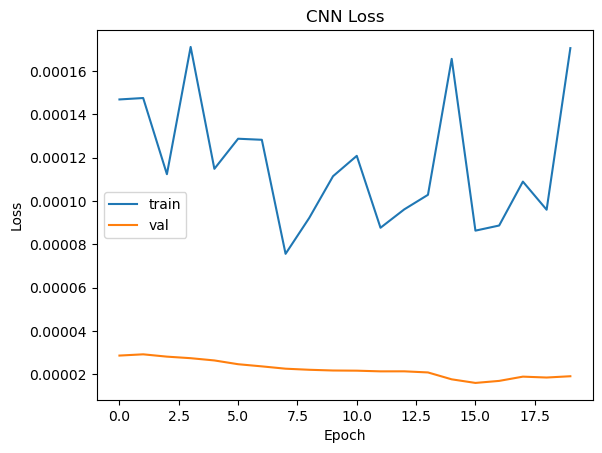

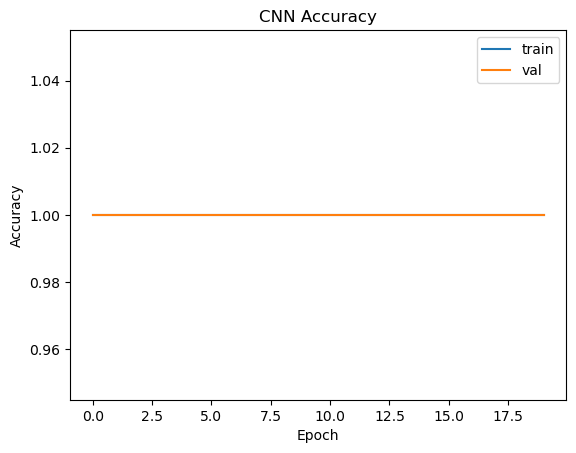

In [39]:
#@title Logging history and visualizing training:
epochs = 20
hist = {"tr_loss": [], "va_loss": [], "tr_acc": [], "va_acc": []}

for ep in range(1, epochs+1):
    tr_loss, tr_acc = train_epoch_cls(cnn, tr_li, ce, opt_cnn)   # returns (loss, accuracy)
    va_loss, va_acc = evaluate_cls(cnn, va_li, ce)               # returns (loss, accuracy)

    hist["tr_loss"].append(tr_loss); hist["va_loss"].append(va_loss)
    hist["tr_acc"].append(tr_acc);   hist["va_acc"].append(va_acc)

    if ep % 5 == 0 or ep == 1 or ep == epochs:
        print(f"[CNN] Epoch {ep:02d}  loss {tr_loss:.3f}/{va_loss:.3f}  acc {tr_acc:.3f}/{va_acc:.3f}")

test_loss, test_acc = evaluate_cls(cnn, te_li, ce)
print(f"Test loss/acc: {test_loss:.3f} / {test_acc:.3f}")

# ---- Curves ----
plt.figure()
plt.plot(hist["tr_loss"], label="train")
plt.plot(hist["va_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist["tr_acc"], label="train")
plt.plot(hist["va_acc"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Accuracy")
plt.legend()
plt.show()

## Exercise F: Too good to be true!
There is something amiss with this accuracy. It seems the model is great from the beggining? What could be the case? Is there a bug in the code? Is the architecture to complex for a dataset that is too simple? Describe through words and code how you reach your conclusion. Ask yourself: Is there overlap in training vs testing? Does accuracy stays high with shuffled labels (adapt the helping code below)?


```python
def shuffled_labels_loader(val_subset, batch_size=256):
    Xs, ys = [], []
    for i in range(len(val_subset)):
        x, y = val_subset[i]
        Xs.append(x.unsqueeze(0))
        ys.append(torch.tensor([y]))
    Xs = torch.cat(Xs, dim=0)
    ys = torch.cat(ys, dim=0)

    perm = torch.randperm(len(ys))
    ys_shuf = ys[perm]

    class _MemDataset(torch.utils.data.Dataset):
        def __init__(self, Xs, ys): self.Xs, self.ys = Xs, ys
        def __len__(self): return len(self.ys)
        def __getitem__(self, i): return self.Xs[i], self.ys[i]

    ds = _MemDataset(Xs, ys_shuf)
    return torch.utils.data.DataLoader(ds, batch_size=batch_size, shuffle=False)

va_li_shuf = shuffled_labels_loader(va_i)
criterion = nn.CrossEntropyLoss()
_ = cnn.eval()
with torch.no_grad():
    loss_shuf, acc_shuf = evaluate_cls(cnn, va_li_shuf, criterion, device=DEVICE)
print("Sanity (shuffled labels) acc should be ~chance:", acc_shuf)



## Exercise Stack G

1. **Splits & Seeds**: Change the train/val/test ratios to (0.6/0.2/0.2). Re-run and record the change in validation/test performance for the MLP. Try 3 different random seeds and average the results.
2. **Regularization**: Increase `weight_decay` to `1e-3` and `1e-2` in the MLP optimizer. What happens to the gap between train and validation accuracy?
3. **Dropout Sweep**: Change the dropout rate in the MLP to `0.0, 0.2, 0.5`. Plot validation accuracy vs. dropout.
4. **Learning Rate**: Try `lr=1e-2` and `lr=1e-4` in the MLP. Which learns faster? Which generalizes better?
5. **Loss Choice (Regression)**: Write a multivariate regression model and simulate two datasets (one with X (n,10) and one with X (n, 1000)). Add an L1 loss option for the regression model. Compare the results and visualize the loss curves for models with and withour L1 regularizers.
6. **Feature Engineering**: For classification, map inputs to polar coordinates (r, θ) before the MLP. Does it help on circles but hurt on moons? Why?
7. **Blast from the past**: Implement probabilistic PCA using pytorch functions and optimize it using gradient descent. Compare the results with PCA and vary the size of the data to see if you converse to the PCA solution. Why or why note?
8. **Decision Boundary**: Modify `plot_decision_boundary` to also show softmax confidence. Discuss regions of high uncertainty.


## Mini Project 2 Details


You can get more information [here](https://drive.google.com/drive/folders/1Ckwfj0L788Tg3E6WAazXBB1W2ATta_w9).


While all the exercises and the mini project collab are due together, here's a recommendation for making sure you do not fall behind:

🧠 Mini Project — Recommended Week of Nov 3rd

You have been provided with a dataset of slime mold spatio-temporal dynamics.
Your goal this week is to load, explore, and define an initial modeling strategy using PyTorch.

🧩 Tasks



1.   Load the dataset


*   Identify and use the right Python package to load the data (hint: .zarr format).
*   Write a simple data loader that converts it into a PyTorch tensor.


2.   Visualize the data


*   Plot a few time frames.
*   Describe what you see — what kind of motion or aggregation is happening?



3.   Inspect the data tensor


*   What is the shape of your data?
*   What do each of the dimensions represent?


4.   Define the learning setup

*   Is this a supervised or unsupervised problem?
*   What is your strategy for modeling this data?
(There is no unique answer — justify your choice.)


5.   Specify the optimization target

*   What loss function will you optimize?
*   How will you split your data into training and testing sets?


6.   First modeling attempt

*   Treat this as a nonlinear regression problem.
*   Write a small model class, train it, and visualize the loss landscape.
*   Try one or two variants (e.g. different architectures or window sizes).

📘 Deliverables

Submit a short notebook including:

* Code to load and visualize the data.

* A short discussion of data shape, modeling strategy, and loss.

* Example plots and initial training results.

## 5) TL;DR for your Toolkit!

- **Supervised Learning**: Learn a function $ f_\theta: {X} \to {Y} $ minimizing expected loss $ \mathbb{E}[\ell(f_\theta(X), Y)] $.
- **Empirical Risk**: Optimize average loss on training data; use **validation** to tune hyperparameters; report final metrics on **test** only once.
- **Common losses**: MSE for regression; Cross-Entropy for classification.
- **Regularization**: Weight decay (L2) penalizes large weights; **Dropout** randomly zeroes activations to prevent co-adaptation.
- **Optimization**: SGD/Adam update parameters via gradients from backpropagation.
- **Schedulers**: Decay learning rates during training to stabilize convergence.
- **Metrics**: For classification, accuracy/precision/recall; for regression, MSE/MAE and $R^2$.
- **Reproducibility**: Fix seeds; log versions; control randomness.
